# Visualization

In [1]:
import numpy as np # numerical python
import pandas as pd # data processing
import matplotlib as plt2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)
print("Matplotlib version:",plt2.__version__)

Pandas version: 1.1.3
Numpy version: 1.19.2
Matplotlib version: 3.3.4


In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
gender_submission = pd.read_csv("data/gender_submission.csv")
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Cabin"] = train["Cabin"].fillna("G6")
train["Embarked"] = train["Embarked"].fillna("Q")
print(pd.isnull(train).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [3]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [5]:
train["Fare"].max()

512.3292

# Fare

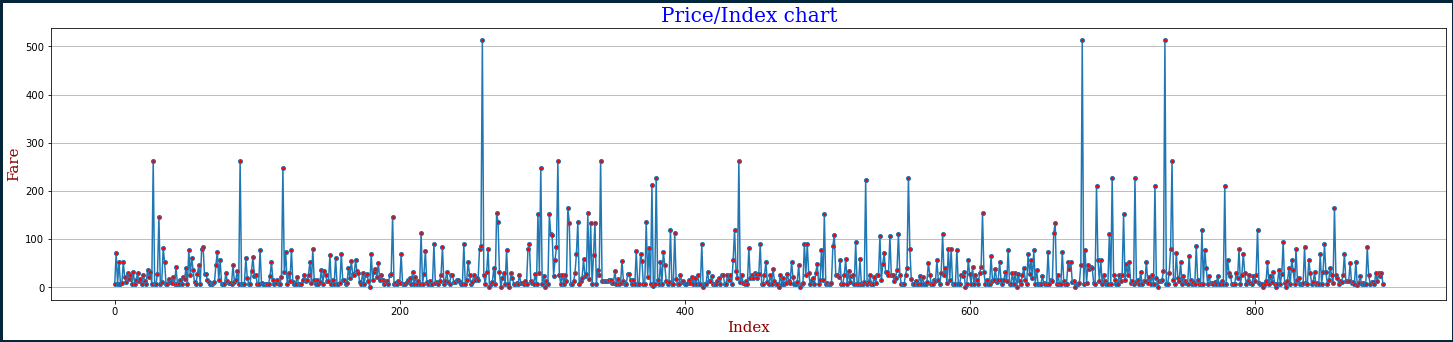

In [6]:
fig = plt.figure(figsize = (25, 5),
                linewidth=5, edgecolor="#04253a")

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Price/Index chart", fontdict = font1)
plt.xlabel("Index", fontdict = font2)
plt.ylabel("Fare", fontdict = font2)
plt.plot(train["Fare"], marker = 'o',mfc="r",ms=4)
plt.grid(axis = "y")#adding grid lines
plt.show()
fig.savefig("images/fare1.png", edgecolor=fig.get_edgecolor())#to save

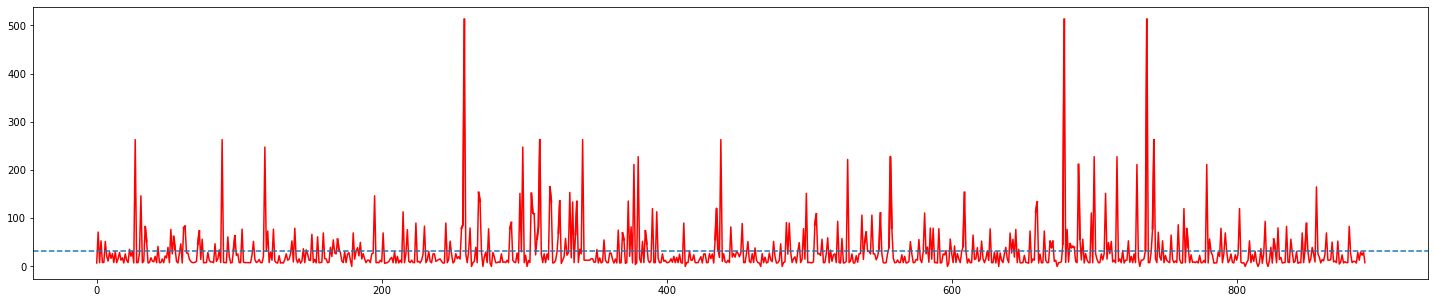

In [7]:
#https://stackoverflow.com/questions/30121773/python-is-it-possible-to-change-line-color-in-a-plot-if-exceeds-a-specific-rang
#Blue line is mean value
a = np.array(train["Fare"])
fig = plt.figure(figsize = (25, 5))
# use a masked array to suppress the values that are too low
a_masked = np.ma.masked_less_equal(a, 32.204208)

# plot the full line
plt.plot(a, 'r')

# plot only the large values
plt.plot(a_masked, 'r', linewidth=2)

# add the threshold value (optional)
plt.axhline(32.204208,  linestyle='--')
plt.show()

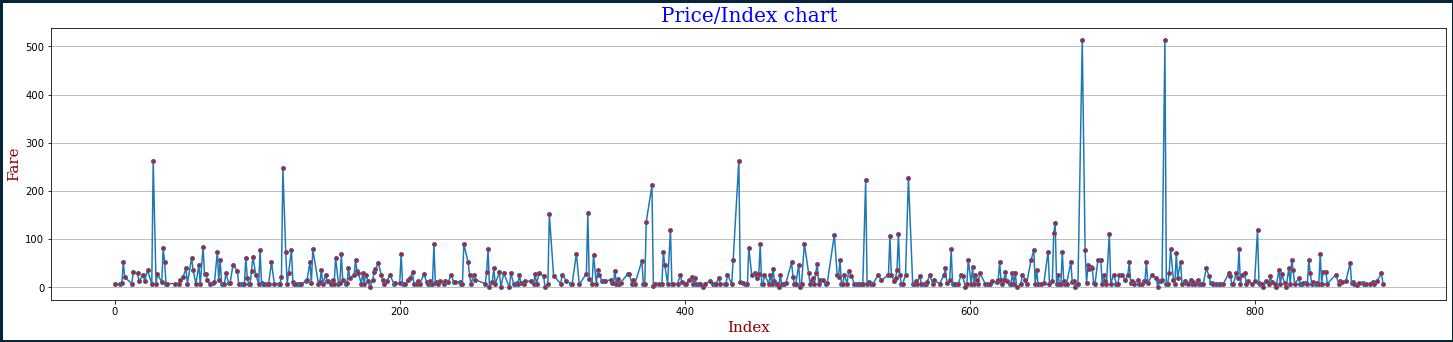

In [8]:
fig = plt.figure(figsize = (25, 5),
                linewidth=5, edgecolor="#04253a")

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Price/Index chart", fontdict = font1)
plt.xlabel("Index", fontdict = font2)
plt.ylabel("Fare", fontdict = font2)
plt.plot(train[train["Sex"]=="male"]["Fare"], marker = 'o',mfc="r",ms=4)
plt.grid(axis = "y")#adding grid lines
plt.show()



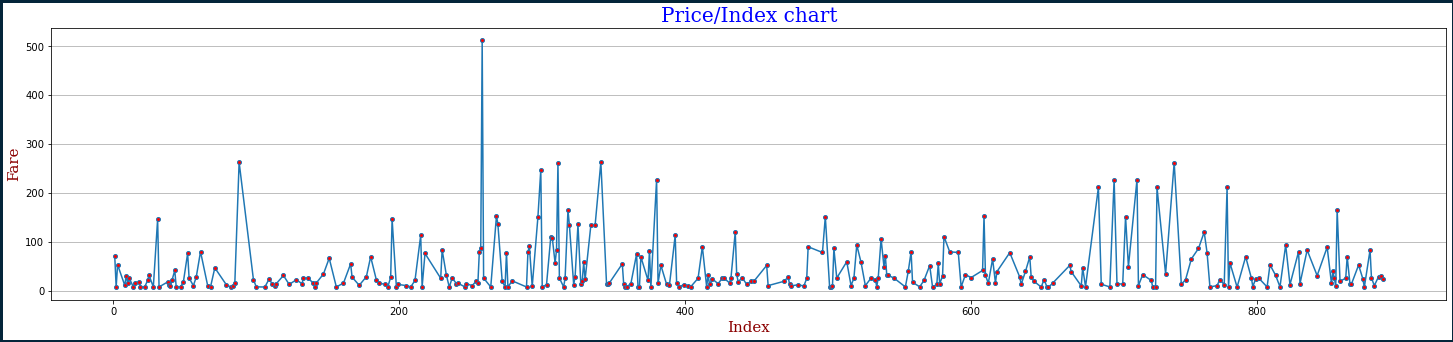

In [9]:
fig = plt.figure(figsize = (25, 5),
                linewidth=5, edgecolor="#04253a")

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Price/Index chart", fontdict = font1)
plt.xlabel("Index", fontdict = font2)
plt.ylabel("Fare", fontdict = font2)
plt.plot(train[train["Sex"]=="female"]["Fare"], marker = 'o',mfc="r",ms=4)
plt.grid(axis = "y")#adding grid lines
plt.show()



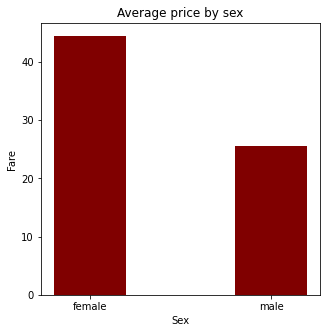

In [10]:
x = ["female","male"]
df = [train[train["Sex"]=="female"]["Fare"].mean(), train[train["Sex"]=="male"]["Fare"].mean()]
fig = plt.figure(figsize = (5, 5))

plt.bar(x, df, color ='maroon',
        width = 0.4)
 
plt.xlabel("Sex")
plt.ylabel("Fare")
plt.title("Average price by sex")
plt.show()

# Scatterplot

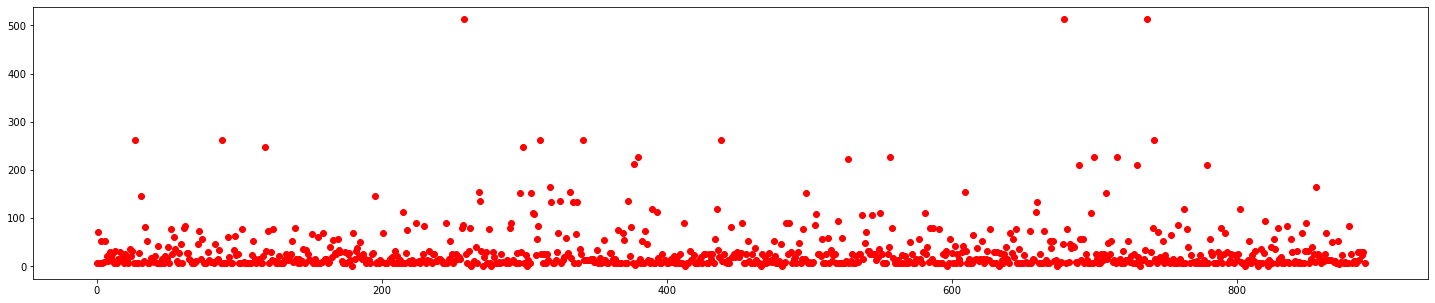

In [11]:
x = list(range(891))
fig = plt.figure(figsize = (25, 5))
plt.scatter(x,train["Fare"], c="r", cmap='viridis')
plt.show()

# Age

In [12]:
age = train["Age"]
train["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Resource: https://www.kaggle.com/subinium/simple-matplotlib-visualization-tips

In [78]:
from matplotlib.ticker import FuncFormatter
def age_band(num):
    for i in range(1, 100):
        if num < 10*i : 
            return f"under {i*10}"
train["age_band"] = train["Age"].apply(age_band)
titanic_age = train[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)

titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

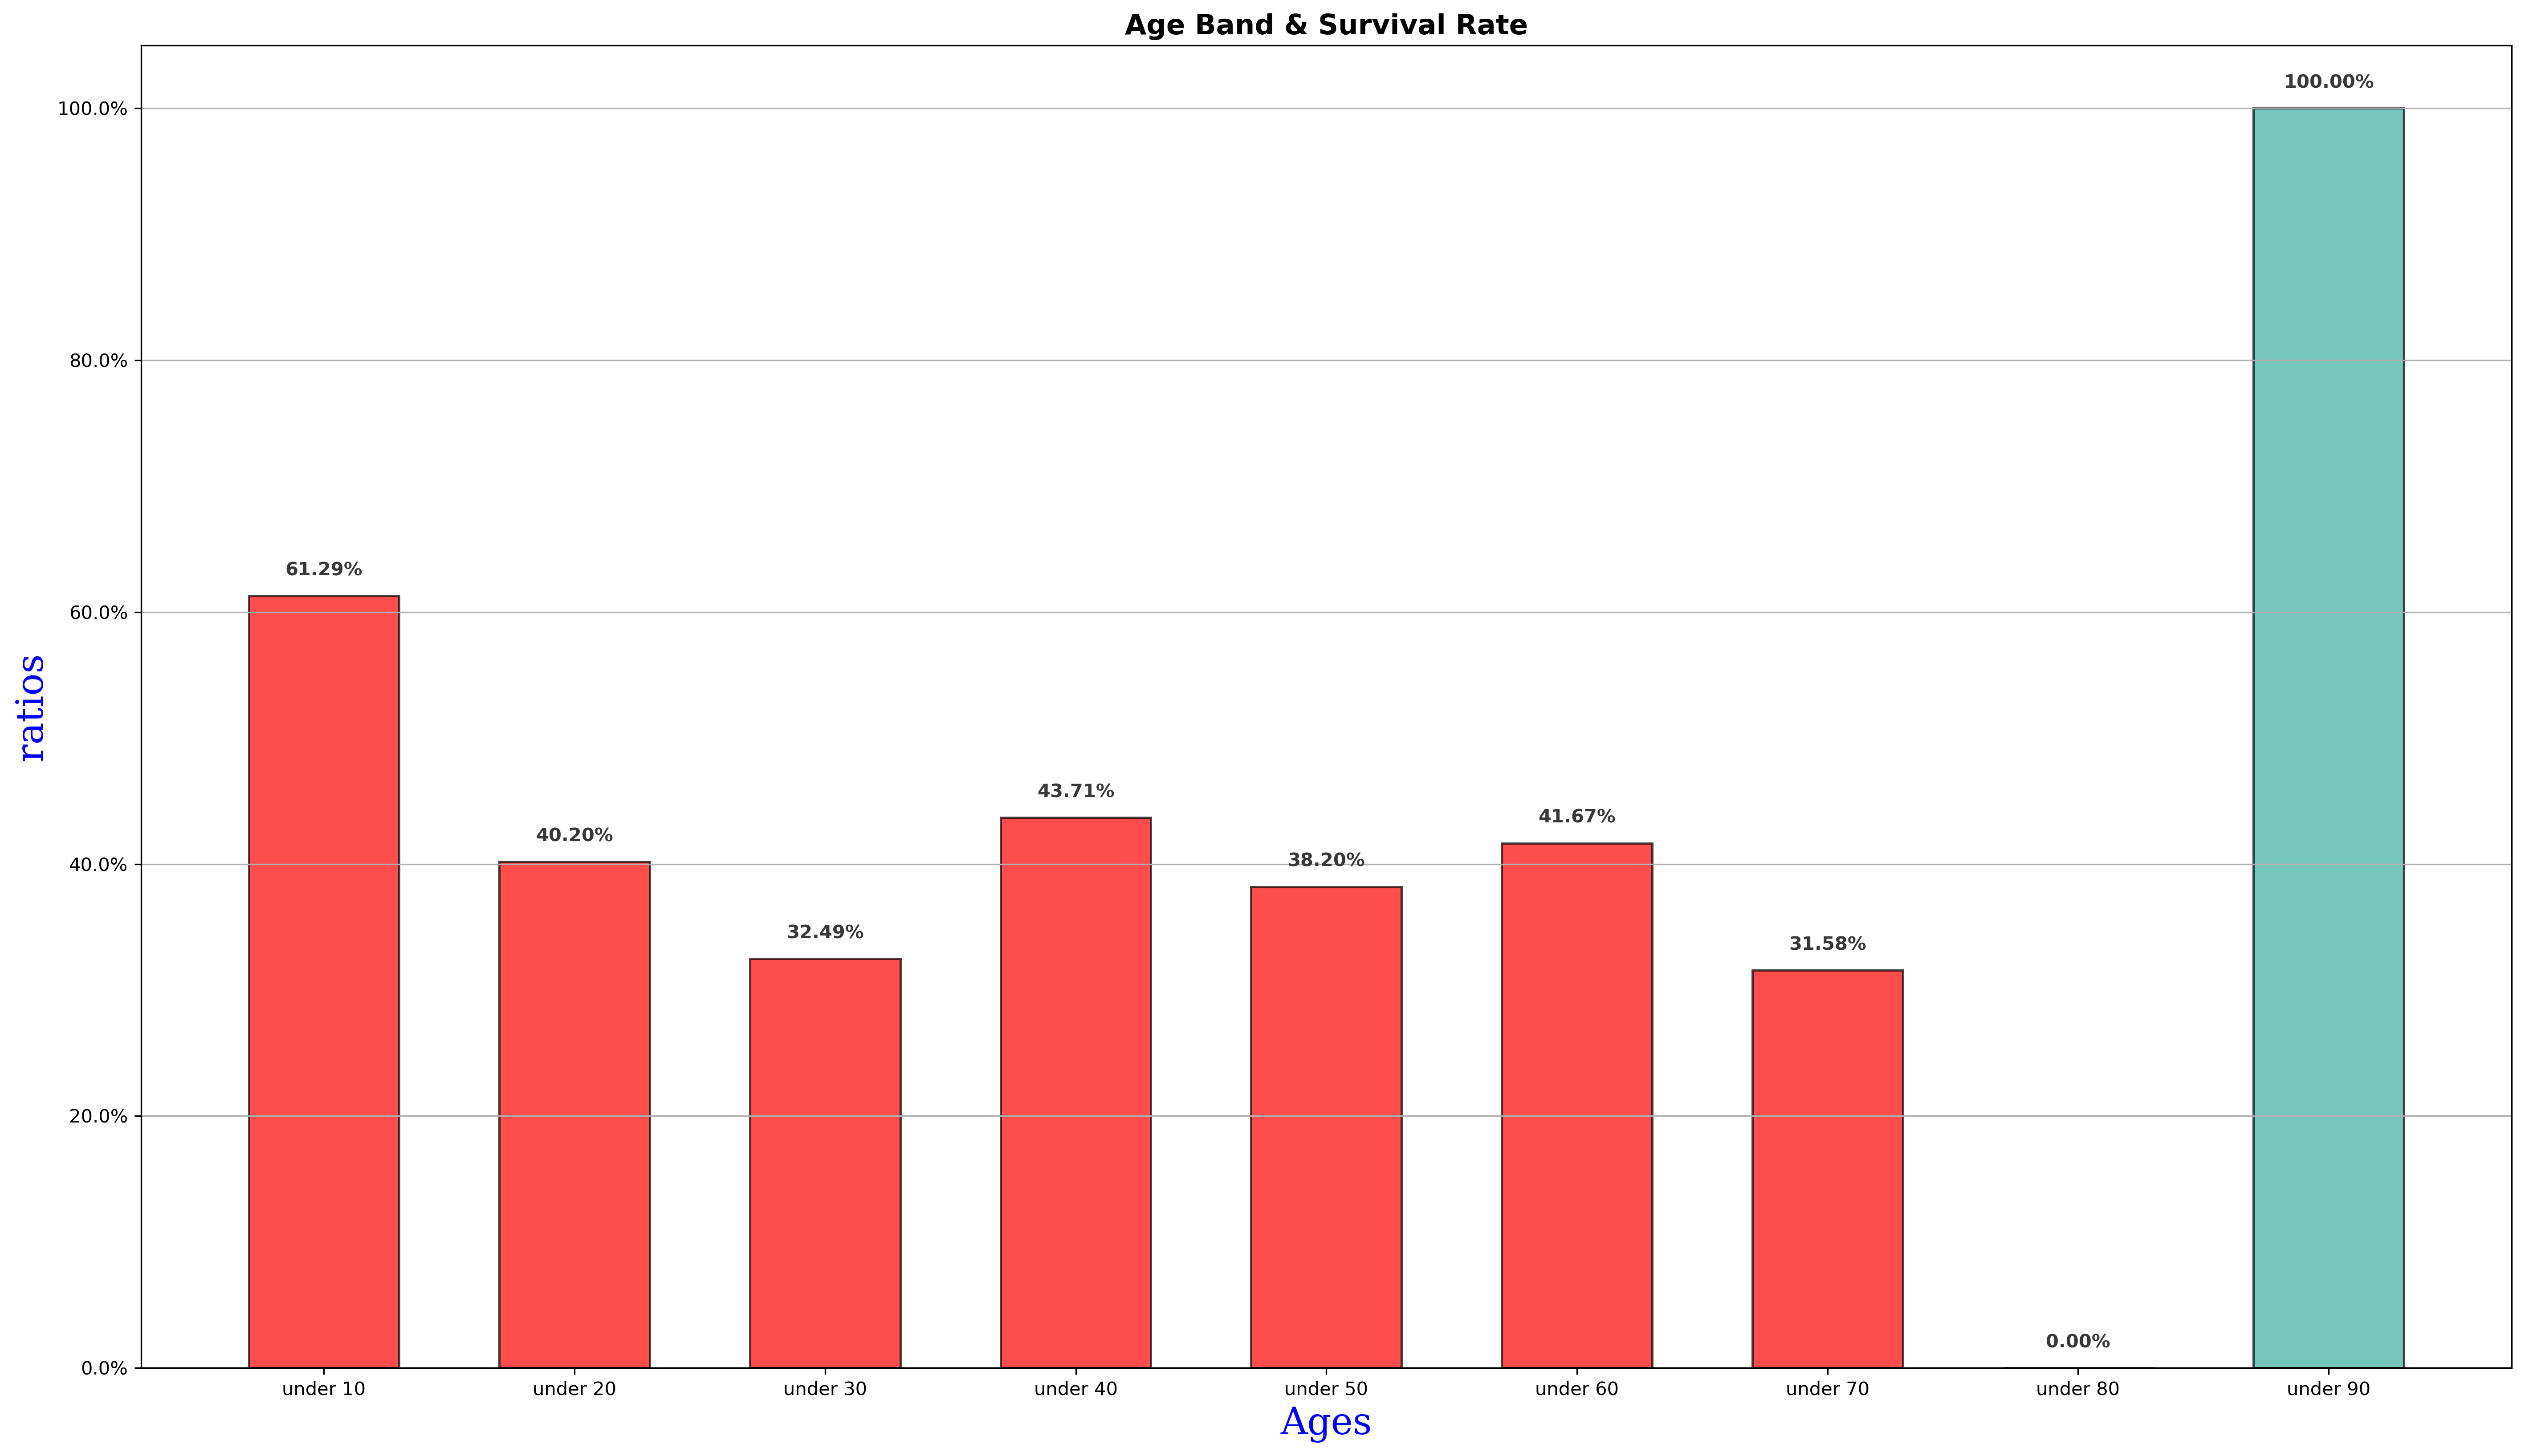

In [127]:
fig, ax = plt.subplots( figsize=(19, 11), dpi=300)

color_map = ['red' for _ in range(9)]
color_map[8] = '#3caea3'#to change last bar
ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], alpha=0.7, 
       color=color_map, width=0.6, edgecolor='black', linewidth=1.2)#,yerr=variance
ax.set_title('Age Band & Survival Rate', fontsize=15, fontweight='bold')
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2),
                   va = 'center', ha='center',fontweight='bold', color='#383838'#black
                  )

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:}%')) 
plt.xlabel("Ages",font1)
plt.ylabel("ratios",font1)
plt.tight_layout()
plt.grid(axis = "y")
plt.show()
fig.savefig("images/ages1_bar_chart.png", edgecolor=fig.get_edgecolor())#to save

# Day 17
Visualization